Blinkit is a quick-commerce platform delivering groceries and essentials in minutes. In such a fast-paced market, understanding sales patterns and customer behavior is key.

This Exploratory Data Analysis will help us:

* Optimize the product mix by identifying which fat content levels or item types perform best.
* Improve store performance by analyzing how outlet size, age, and location affect sales.
* Drive strategic decisions through insights that support better planning for inventory, marketing, and expansion.

### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [5]:
df = pd.read_csv('blinkit_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


This dataset contains sales and product level information from Blinkit platform. It includes around 8523 records and captures various features related to products, outlets and sales performance

In [6]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


It seems that the Item Fat Content column needs some cleaning.

### Data Cleaning

In [7]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
def item_fat_content(x):
    if x == 'reg':
        x = 'Regular'
    if x == 'low fat':
        x = 'Low Fat'
    if x == 'LF':
        x = 'Low Fat'
    return x
        
df['Item Fat Content']= df['Item Fat Content'].apply(item_fat_content)

In [13]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### Exploratory Data Analysis

#### Key Performance Indicators

In [24]:
# Total Sales
total_sales = df['Sales'].sum()
print('Total Sales : ', total_sales.round())

# Average Sales
average_sales = df['Sales'].mean()
print('Average Sales : ', average_sales.round())

#Number of Items sold
no_of_items_sold = df['Sales'].count()
print('Number of Items Sold : ', no_of_items_sold.round())

# Average ratings
average_ratings = df['Rating'].mean()
print('Average Ratings : ', average_ratings.round())

Total Sales :  1201681.0
Average Sales :  141.0
Number of Items Sold :  8523
Average Ratings :  4.0


### Graphical Analysis

#### Total Sales by Fat Content

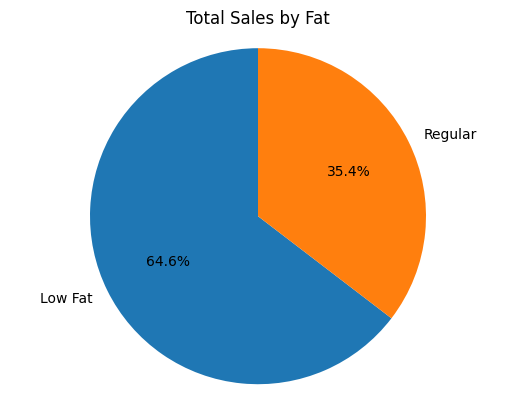

In [41]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels= sales_by_fat.index, autopct='%.1f%%', startangle= 90)
plt.title('Total Sales by Fat')
plt.axis('equal')
plt.show()

#### Total Sales by Item Type

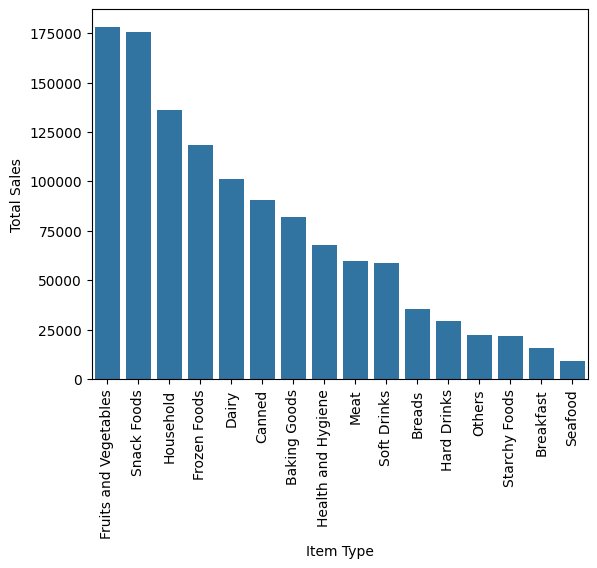

In [57]:
sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending= False).reset_index()
sns.barplot(data= sales_by_item, x = 'Item Type', y = 'Sales')
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

#### Fat Content by Outlet for Total Sales

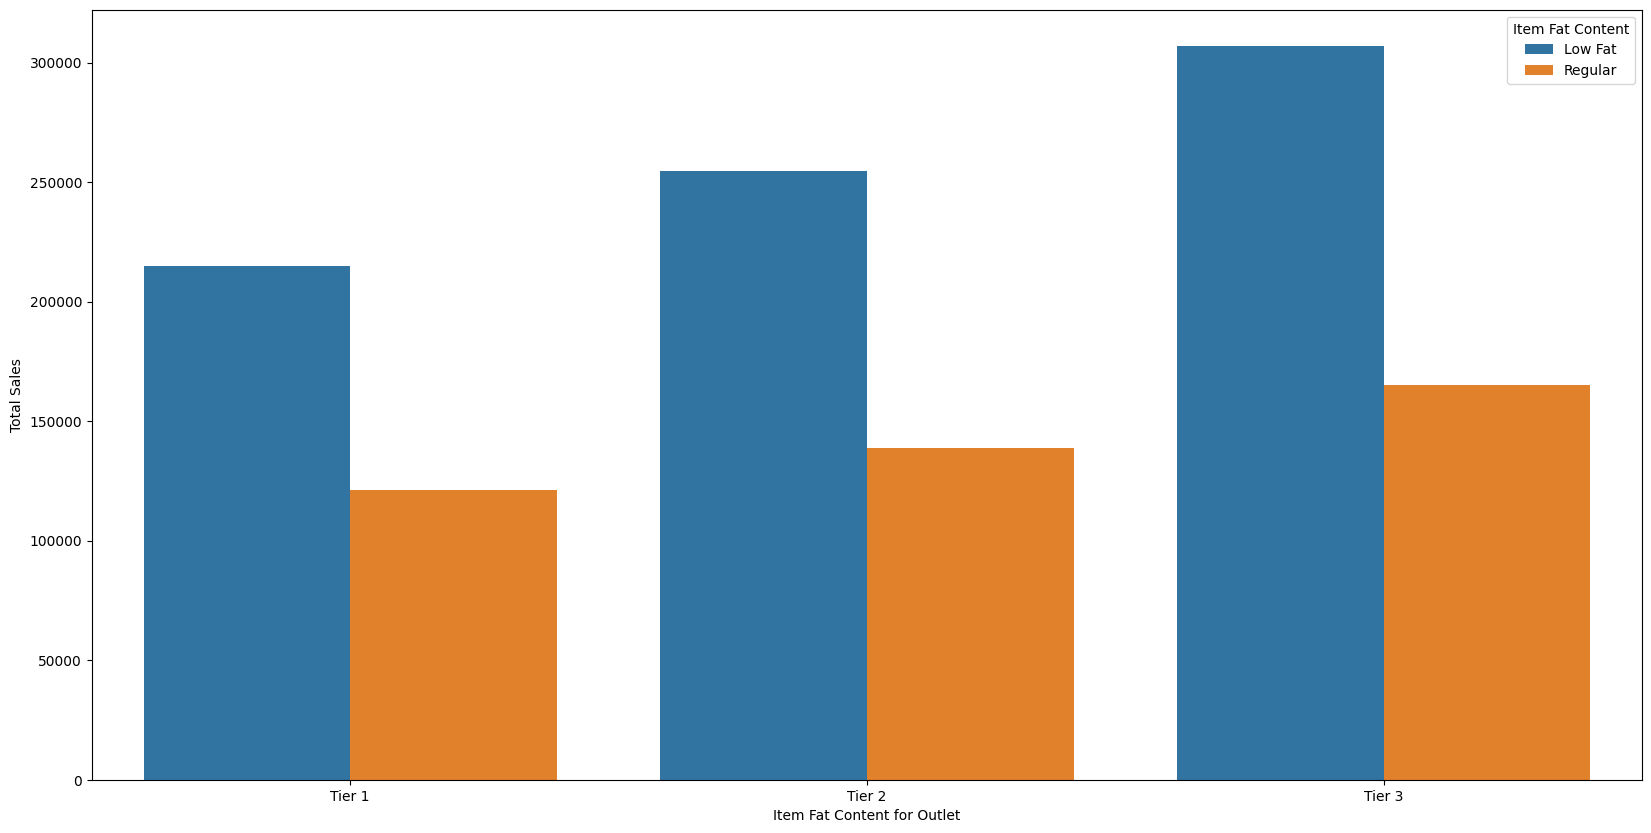

In [74]:
fat_content_by_outlet = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().reset_index()
plt.figure(figsize= [20, 10])

sns.barplot(data = fat_content_by_outlet, x= 'Outlet Location Type', y= 'Sales', hue= 'Item Fat Content')
plt.xlabel('Item Fat Content for Outlet')
plt.ylabel('Total Sales')
plt.show()


#### Total Sale by Outlet Establishment

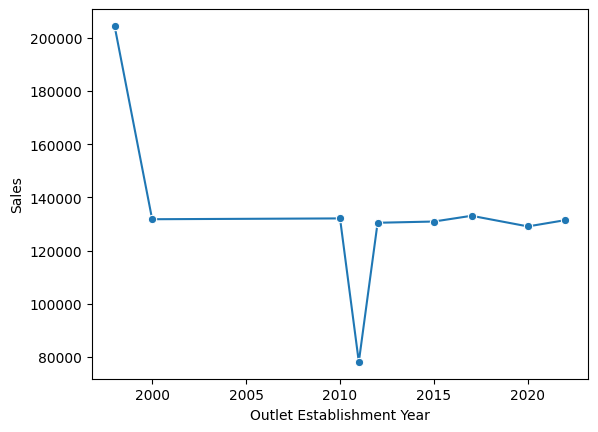

In [87]:
sales_by_establishment = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()
sns.lineplot(data= sales_by_establishment, x= 'Outlet Establishment Year', y= 'Sales',marker='o', dashes=False)
plt.show()


#### Sales by Outlet Size

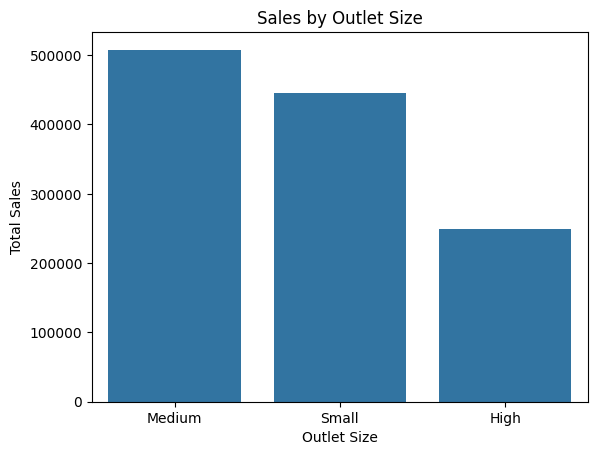

In [91]:
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum().reset_index()

sales_by_outlet_size = sales_by_outlet_size.sort_values(by='Sales', ascending=False)

sns.barplot(data=sales_by_outlet_size, x='Outlet Size', y='Sales')

plt.xlabel('Outlet Size')
plt.ylabel('Total Sales')
plt.title('Sales by Outlet Size')

plt.show()

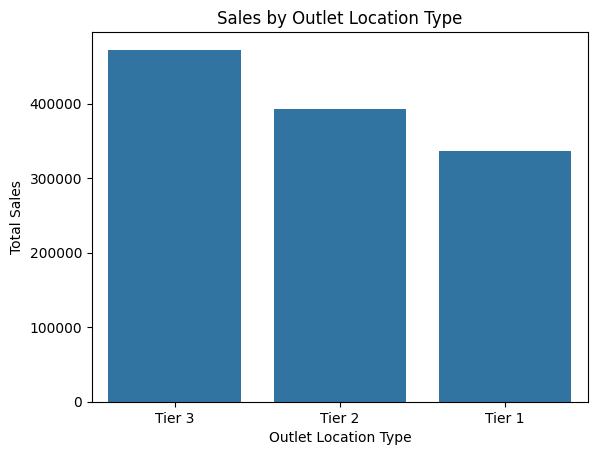

In [93]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

sns.barplot(data=sales_by_location, x='Outlet Location Type', y='Sales')

plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Sales by Outlet Location Type')

plt.show()

### Recommendations based on Observations

#### 🔹 1. **Sales by Outlet Location Type**

* **Observation**: Tier 3 locations generate the highest total sales, followed by Tier 2 and then Tier 1.
* **Recommendation**:

  * Focus expansion in **Tier 3** areas as they show the strongest consumer demand.
  * Reevaluate marketing and product strategies for **Tier 1** outlets to improve their performance.

#### 🔹 2. **Sales by Outlet Size**

* **Observation**: **Medium-sized** outlets lead in sales, followed by Small, with **High-sized outlets performing the worst**.
* **Recommendation**:

  * Investigate why **High-sized outlets underperform**—possibly due to inefficiencies or high operational costs.
  * Optimize inventory and promotion efforts in **Medium and Small** outlets where ROI seems stronger.

#### 🔹 3. **Sales by Outlet Establishment Year**

* **Observation**: Older outlets (e.g., pre-2000) show **higher sales**, while newer ones (especially around 2011) show **dips in performance**.
* **Recommendation**:

  * Study best practices from **older, successful outlets** and replicate them in newer ones.
  * Investigate underperforming newer outlets for issues in **location, staff training, or promotion strategies**.

#### 🔹 4. **Sales by Item Fat Content per Outlet Location**

* **Observation**: Across all tiers, **Low Fat** items consistently outperform **Regular** fat items in terms of sales.
* **Recommendation**:

  * Expand the range of **Low Fat** products, especially in **Tier 3** where overall demand is highest.
  * Position Low Fat options more prominently in marketing campaigns.
